In [2]:
import pandas as pd
#load dataset
df = pd.read_csv('/content/SucideData.csv')

In [3]:
#basic data checks
print('Dataset Info:')
df.info()
print('\nSummary Statistics:')
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB

Summary Statistics:
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04     

In [4]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
#delete country-year column if exists
if 'country-year' in df.columns:
  df.drop(columns=['country-year'], inplace=True)

In [5]:
#Age column adjustments
if 'age' in df.columns:
  df['age'] = df['age'].astype(str).str.replace('years', '', regex=True)

In [6]:
# Rename suicide rate column for easier reference
df.rename(columns={"suicides/100k pop": "suicide_rate"}, inplace=True)

In [7]:
#Handling missing values Replace NaN with 0
df.fillna(0, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicide_rate,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,0.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,0.0,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,0.0,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,0.0,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,0.0,"2,156,624,900",796,Boomers


In [8]:
#check for duplicates
print("Duplicated Rows:\n", df[df.duplicated()])

Duplicated Rows:
 Empty DataFrame
Columns: [country, year, sex, age, suicides_no, population, suicide_rate, HDI for year,  gdp_for_year, gdp_per_capita, generation]
Index: []


In [10]:
df_cleaned = df.drop_duplicates(keep='first')
print("\nData after removing duplicates:\n", df_cleaned)


Data after removing duplicates:
           country  year     sex     age  suicides_no  population  \
0         Albania  1987    male  15-24            21      312900   
1         Albania  1987    male  35-54            16      308000   
2         Albania  1987  female  15-24            14      289700   
3         Albania  1987    male    75+             1       21800   
4         Albania  1987    male  25-34             9      274300   
...           ...   ...     ...     ...          ...         ...   
27815  Uzbekistan  2014  female  35-54           107     3620833   
27816  Uzbekistan  2014  female    75+             9      348465   
27817  Uzbekistan  2014    male   5-14            60     2762158   
27818  Uzbekistan  2014  female   5-14            44     2631600   
27819  Uzbekistan  2014  female  55-74            21     1438935   

       suicide_rate  HDI for year    gdp_for_year  gdp_per_capita  \
0              6.71         0.000   2,156,624,900             796   
1          

In [11]:
summary = df.groupby('generation').agg({'gdp_per_capita': ['sum','mean','max','min']})
print(summary)

                gdp_per_capita                           
                           sum          mean     max  min
generation                                               
Boomers               79750168  15981.997595  126352  251
G.I. Generation       28519510  10393.407434   56499  251
Generation X          99996594  15604.961610  126352  251
Generation Z          37678558  25631.672109  126352  814
Millenials           111331886  19050.630732  126352  251
Silent               111948324  17590.874293  126352  251


In [12]:
summary = df.groupby('year').agg({'suicide_rate': ['count','mean','max','min']})
print(summary)

     suicide_rate                        
            count       mean     max  min
year                                     
1985          576  11.826198  144.65  0.0
1986          576  11.423333  123.72  0.0
1987          648  11.644213  131.87  0.0
1988          588  12.709405  138.89  0.0
1989          624  12.879071  122.41  0.0
1990          768  12.862956  150.00  0.0
1991          768  13.438880  176.91  0.0
1992          780  13.498564  177.61  0.0
1993          780  13.833705  177.57  0.0
1994          816  14.073272  176.26  0.0
1995          936  15.662671  224.97  0.0
1996          924  15.305422  151.33  0.0
1997          924  14.954361  161.92  0.0
1998          948  14.926920  125.78  0.0
1999          996  14.532038  162.67  0.0
2000         1032  13.941328  144.15  0.0
2001         1056  13.519138  144.71  0.0
2002         1032  13.786550  157.48  0.0
2003         1032  13.205019  170.86  0.0
2004         1008  12.481944  172.80  0.0
2005         1008  12.068442  176.

In [13]:
summary = df.groupby('country').agg({'suicides_no': ['sum','mean','max','min']})
print(summary)

                     suicides_no                        
                             sum         mean    max min
country                                                 
Albania                     1970     7.462121     39   0
Antigua and Barbuda           11     0.033951      2   0
Argentina                  82219   221.018817    745   7
Armenia                     1905     6.392617     32   0
Aruba                        101     0.601190      4   0
...                          ...          ...    ...  ..
United Arab Emirates         622     8.638889     52   0
United Kingdom            136805   367.755376   1743   0
United States            1034013  2779.604839  11767  50
Uruguay                    13138    39.101190    152   0
Uzbekistan                 34803   131.829545    528   3

[101 rows x 4 columns]


In [14]:
#changes in suicide rates over the years

df.groupby('year')['suicide_rate'].sum().sort_values(ascending=False)

,suicide_rate
year,
1995,14660.26
1999,14473.91
2000,14387.45
2001,14276.21
2002,14227.72
1998,14150.72
1996,14142.21
1997,13817.83
2003,13627.58


In [15]:
df.groupby('sex')['suicides_no'].sum().sort_values(ascending=False)

,suicides_no
sex,
male,5188910
female,1559510


In [16]:
df.groupby('generation')['suicide_rate'].sum().sort_values(ascending=False)

,suicide_rate
generation,
Silent,117217.55
Boomers,73563.05
Generation X,67648.45
G.I. Generation,65708.86
Millenials,31461.74
Generation Z,944.18


In [17]:
#suicide rate among different nations
df.groupby('country')['suicide_rate'].sum().sort_values(ascending=False)

,suicide_rate
country,
Russian Federation,11305.13
Lithuania,10588.88
Hungary,10156.07
Kazakhstan,9519.52
Republic of Korea,9350.45
...,...
Jamaica,106.44
United Arab Emirates,94.89
Oman,26.50


**DATA VISUALIZATION USING SEABORN AND MATPLOTLIB**

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicide_rate,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,0.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,0.0,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,0.0,"2,156,624,900",796,Generation X


Top 10 Countries with Highest Suicide Rates

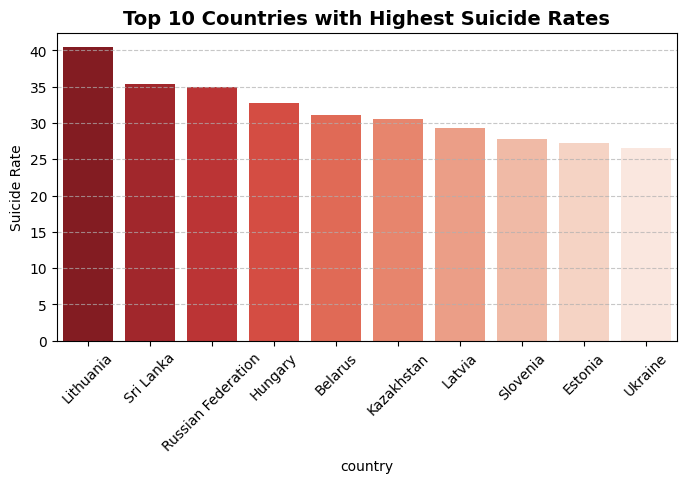

In [20]:
top_10 = df.groupby("country")["suicide_rate"].mean().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10.index, y=top_10.values, hue=top_10.index, palette="Reds_r", legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Highest Suicide Rates", fontsize=14, fontweight='bold')
plt.ylabel("Suicide Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bottom 10 Countries with Lowest Suicide Rates

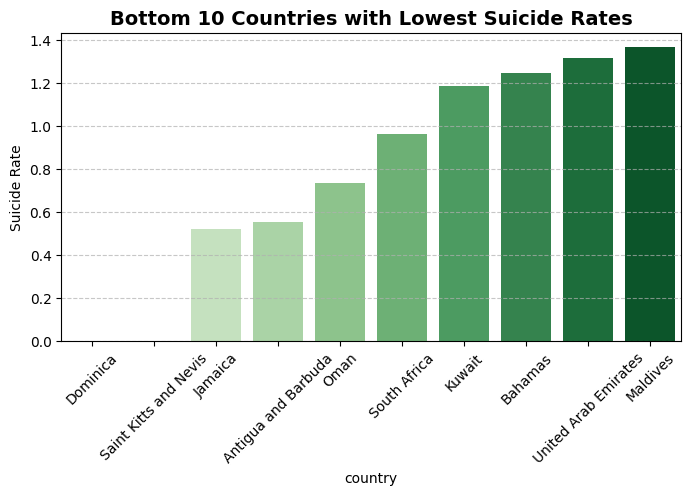

In [21]:
bottom_10 = df.groupby("country")["suicide_rate"].mean().nsmallest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=bottom_10.index, y=bottom_10.values, hue=bottom_10.index,  palette="Greens", legend=False)
plt.xticks(rotation=45)
plt.title("Bottom 10 Countries with Lowest Suicide Rates", fontsize=14, fontweight='bold')
plt.ylabel("Suicide Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Suicide Rate Trends Over the Years


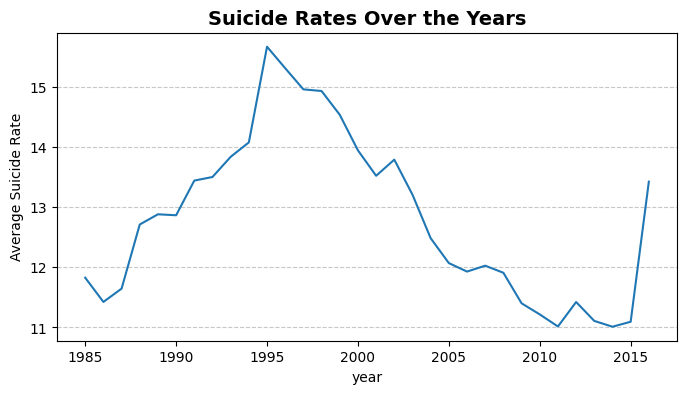

In [22]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x="year", y="suicide_rate", estimator="mean", errorbar=None)
plt.title("Suicide Rates Over the Years", fontsize=14, fontweight='bold')
plt.ylabel("Average Suicide Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Compare Suicide Rate Between Males and Females


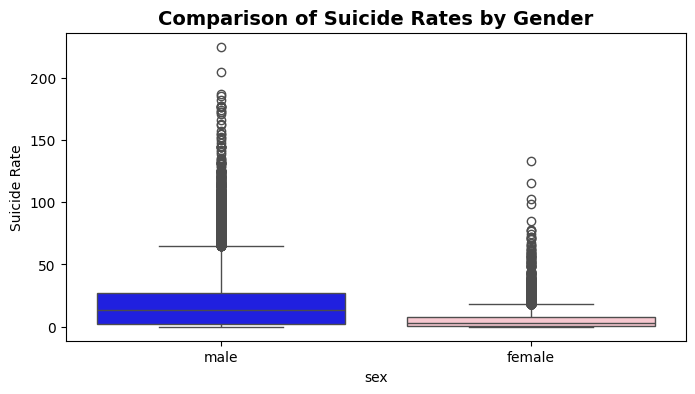

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="sex", y="suicide_rate", hue="sex", palette=["blue", "pink"], legend=False)
plt.title("Comparison of Suicide Rates by Gender", fontsize=14, fontweight='bold')
plt.ylabel("Suicide Rate")
plt.show()


Correlation Between GDP Per Capita and Suicides/100k pop


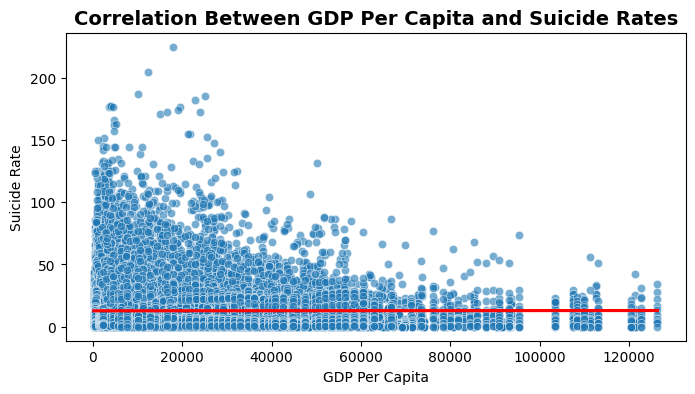

In [24]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="gdp_per_capita", y="suicide_rate", alpha=0.6)
sns.regplot(data=df, x="gdp_per_capita", y="suicide_rate", scatter=False, color="red")
plt.title("Correlation Between GDP Per Capita and Suicide Rates", fontsize=14, fontweight='bold')
plt.xlabel("GDP Per Capita")
plt.ylabel("Suicide Rate")
plt.show()

Most Affected Generation

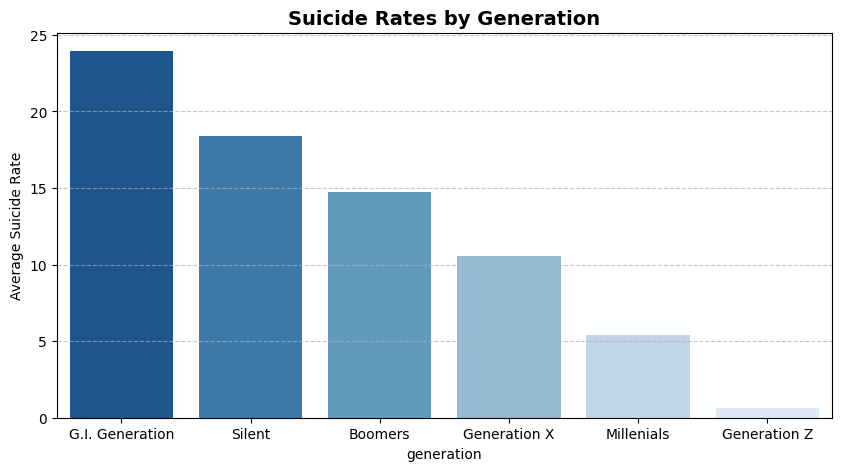

In [25]:
generation_impact = df.groupby("generation")["suicide_rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=generation_impact.index, y=generation_impact.values, hue=generation_impact.index, palette="Blues_r", legend=False)
plt.title("Suicide Rates by Generation", fontsize=14, fontweight='bold')
plt.ylabel("Average Suicide Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Age Group with Highest Suicide Rate


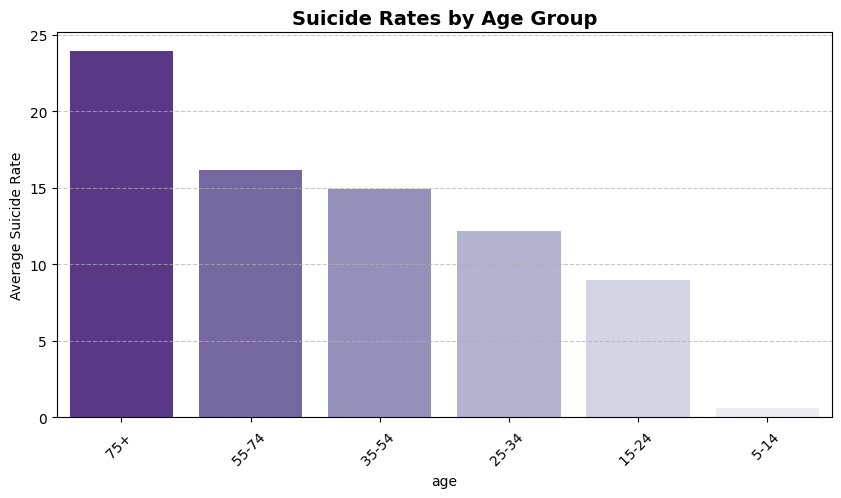

In [26]:
age_group_impact = df.groupby("age")["suicide_rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_impact.index, y=age_group_impact.values, hue=age_group_impact.index, palette="Purples_r", legend=False)
plt.title("Suicide Rates by Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Average Suicide Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distribution of Suicide Rates Across Generations

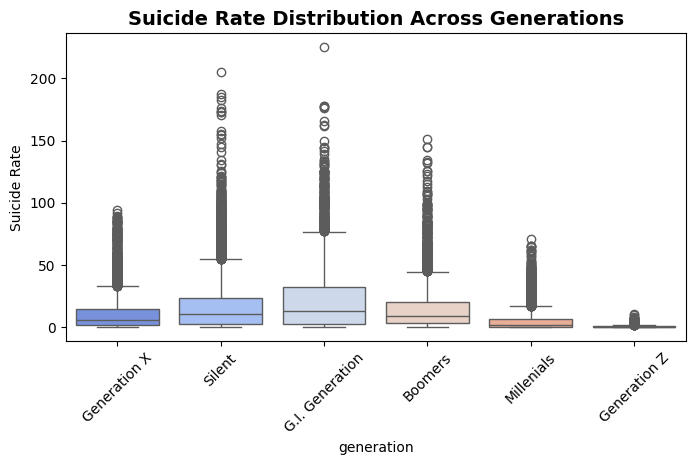

In [27]:

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="generation", y="suicide_rate", hue='generation', palette="coolwarm", legend=False)
plt.title("Suicide Rate Distribution Across Generations", fontsize=14, fontweight='bold')
plt.ylabel("Suicide Rate")
plt.xticks(rotation=45)
plt.show()